# Name:- ARCHANA DIXIT
### Course:- DATA SCIENCE AND BISINESS ANALYTICS 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv("C:\\Users\\archy\\OneDrive\\Documents\\TSF-GRIP\\task__1.csv")

**By using the above data we will predict the percentage of the student depending on hours spent on their studies.**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

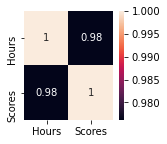

In [7]:
df.corr()
plt.figure(figsize = (2,2))
sns.heatmap(df.corr(),annot = True)

**From the above both the plot we can see that there is positive correlation and linear realtion between the both variables.**


## EDA

[]

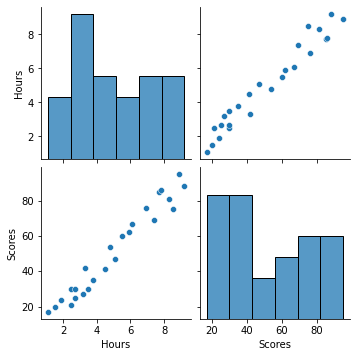

In [8]:
sns.pairplot(df)
plt.plot()

***from the above diagram we can see that there is linear relationship between the two variables.***

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

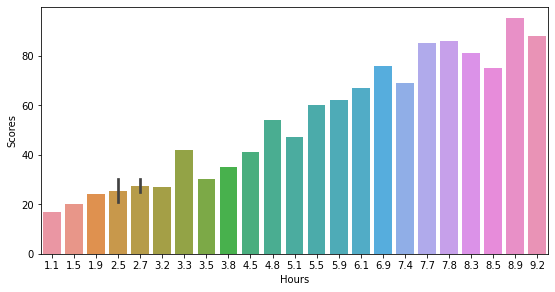

In [9]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df['Hours'], y=df['Scores'], ax=ax1)

#df.barplot(x='Hours', y='Scores', style='*')  
#plt.title('Hours And Percentage')  
#plt.xlabel('Hours Studied')  
#plt.ylabel('Percentage Score')  
#plt.show()

In [10]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

### Linear regression Model building

In [11]:
from sklearn.model_selection import train_test_split  


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state =0)

In [13]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
#getting the score on training set
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, Y_train))


The coefficient of determination R^2 of the prediction on Train set 0.9484509249326872


In [15]:
#getting the score on testing set
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, Y_test))


The coefficient of determination R^2 of the prediction on Test set 0.9367661043365055


In [16]:
#m = l_reg.coef_   #linear regression line slope
#c = l_reg.intercept_ 

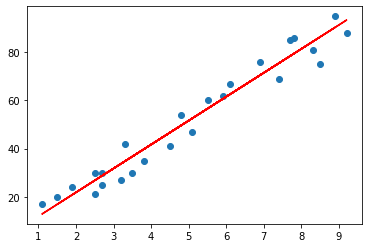

In [17]:
line = regression_model.coef_*X+regression_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color="r");
plt.show()

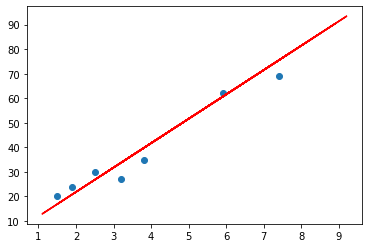

In [18]:
line = regression_model.coef_*X+regression_model.intercept_

# Plotting for the test data
plt.scatter(X_test, Y_test)
plt.plot(X, line, color="r");
plt.show()

In [19]:
print(X_test) 
ypred = regression_model.predict(X_test) 



[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [20]:
#Predictions

ypred = regression_model.predict(X_test)
print(ypred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


**Above is the predicted score on test dataset.**

In [21]:
df_1 = pd.DataFrame({'Actual': Y_test, 'Predicted': ypred})  
df_1 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Above is the actual score VS predicted score on the testdata set**

In [22]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regression_model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.89


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, ypred)) 

Mean Absolute Error: 4.130879918502486


In [24]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(Y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 4.5092043283688055


**We can check the perfomance of the algorithm on the dataset by calculating "mean absolute error" and "Root mean square error"**

***We can predict based on our data now from the below code***

In [27]:
#Score prediction model
def score_prediction():
    x=float(input('Enter hours studied to predict scores: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = regression_model.predict(test)
    print('\n')
    print("No of Hours studied = {}".format(hours))
    print("Score Predicted = {}".format(round(new_pred[0]),2))

In [28]:
score_prediction()


Enter hours studied to predict scores: 7


No of Hours = 7.0
Score Predicted = 72
